In [1]:
import pandas as pd

# Load Data
classes = pd.read_csv('elliptic_txs_classes.csv')
edgelist = pd.read_csv('elliptic_txs_edgelist.csv')
features = pd.read_csv('elliptic_txs_features.csv', header=None)

# Understand Data
print(classes.info())
print(edgelist.info())
print(features.info())

# Preview Data
print(classes.head())
print(edgelist.head())
print(features.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203769 entries, 0 to 203768
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   txId    203769 non-null  int64 
 1   class   203769 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234355 entries, 0 to 234354
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   txId1   234355 non-null  int64
 1   txId2   234355 non-null  int64
dtypes: int64(2)
memory usage: 3.6 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203769 entries, 0 to 203768
Columns: 167 entries, 0 to 166
dtypes: float64(165), int64(2)
memory usage: 259.6 MB
None
        txId    class
0  230425980  unknown
1    5530458  unknown
2  232022460  unknown
3  232438397        2
4  230460314  unknown
       txId1      txId2
0  230425980    5530458
1  232022460  232438397
2  230460314  2304

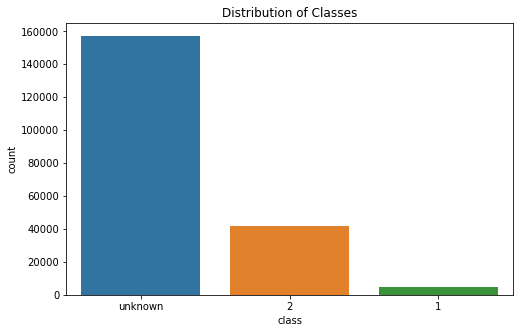

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(data=classes, x='class')
plt.title('Distribution of Classes')
plt.show()


array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>,
        <AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>,
        <AxesSubplot:title={'center':'8'}>,
        <AxesSubplot:title={'center':'9'}>,
        <AxesSubplot:title={'center':'10'}>,
        <AxesSubplot:title={'center':'11'}>,
        <AxesSubplot:title={'center':'12'}>],
       [<AxesSubplot:title={'center':'13'}>,
        <AxesSubplot:title={'center':'14'}>,
        <AxesSubplot:title={'center':'15'}>,
        <AxesSubplot:title={'center':'16'}>,
        <AxesSubplot:title={'center':'17'}>,
        <AxesSubplot:title={'center':'18'}>,
        <AxesSubplot:title={'center':'19'}>,
        <AxesSubplot:title={'center':'20'}>,
        <AxesSubplot:title={'center':'21'}>,
        <AxesSubplo

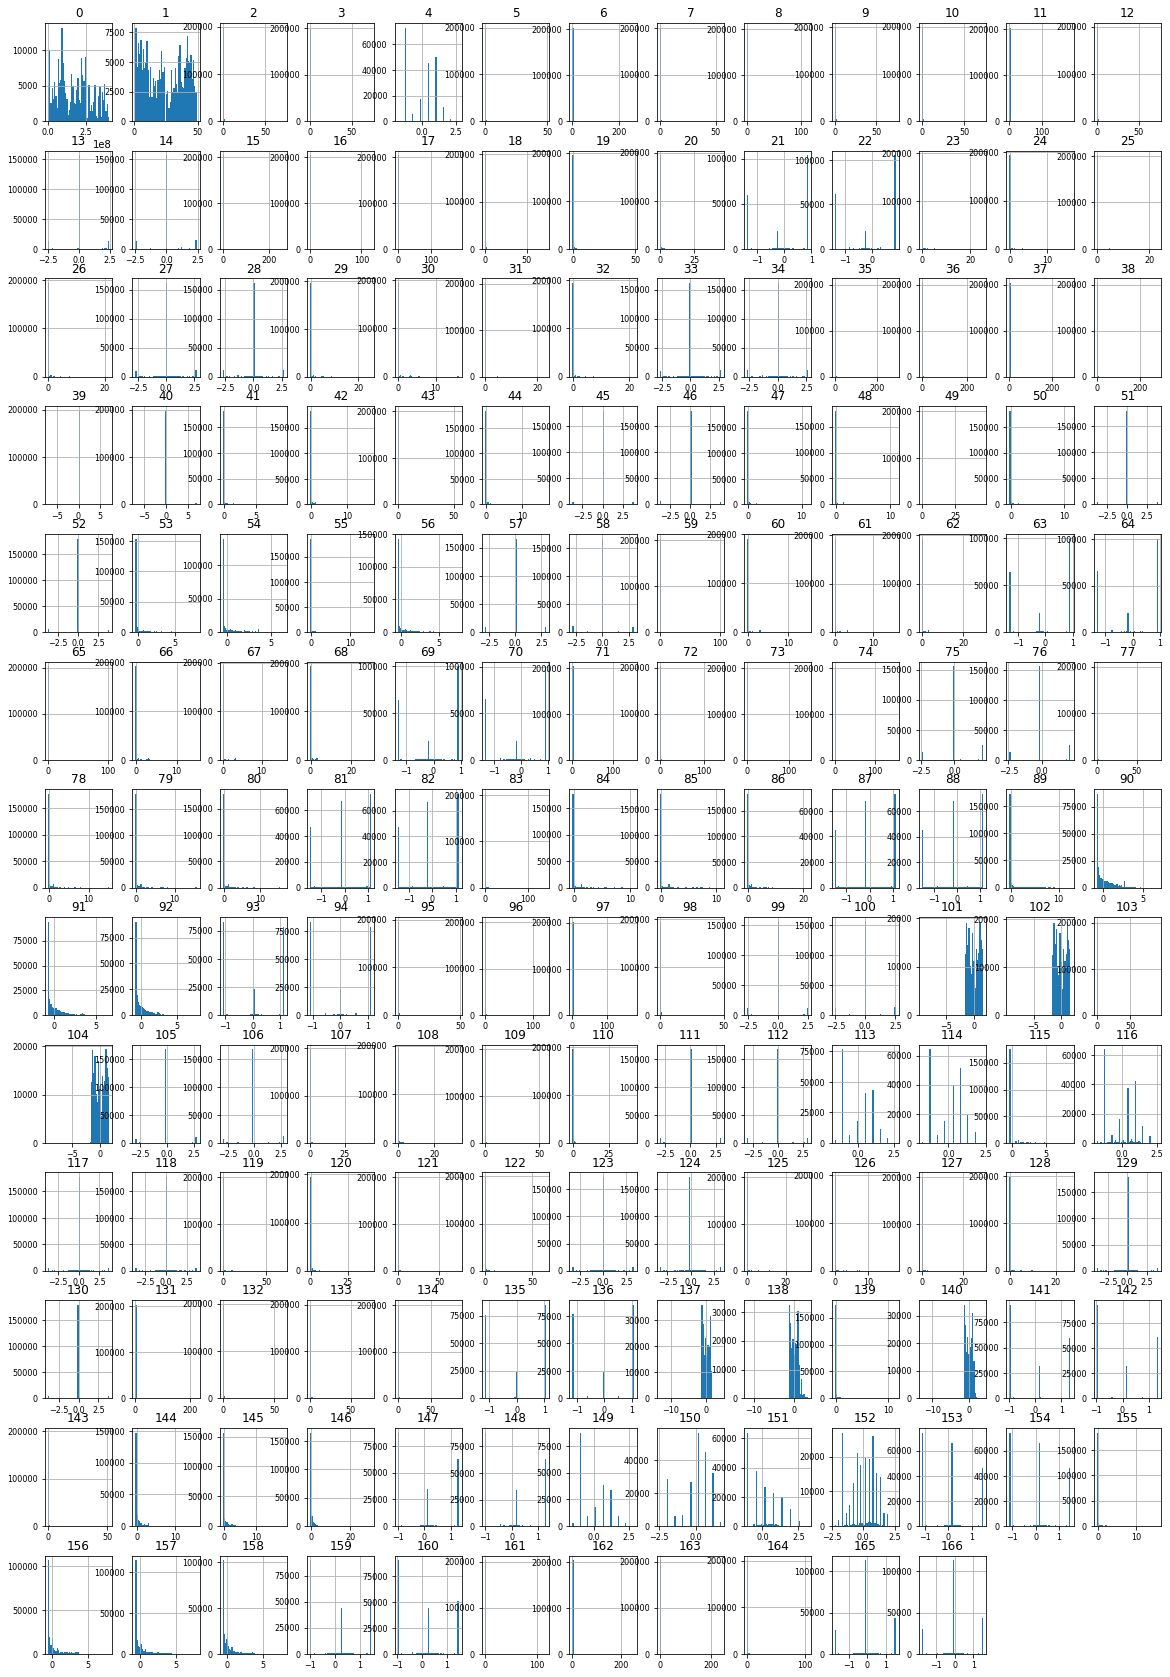

In [3]:
# Visualize feature distributions (histograms, box plots, etc.)
features.hist(figsize=(20, 30), bins=50, xlabelsize=8, ylabelsize=8)

<AxesSubplot:xlabel='Importance', ylabel='Feature'>

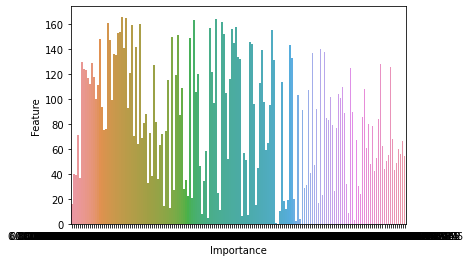

In [4]:
from sklearn.ensemble import RandomForestClassifier

#  Feature Analysis:
clf = RandomForestClassifier()
clf.fit(features, classes['class'])

# Get and plot feature importances
importances = clf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': list(features.columns), 'Importance': importances})
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.sort_values(by='Importance', ascending=False))

In [5]:
import pandas as pd

# Load Data
classes = pd.read_csv('elliptic_txs_classes.csv')
edgelist = pd.read_csv('elliptic_txs_edgelist.csv')
features = pd.read_csv('elliptic_txs_features.csv', header=None)

# Understand Data
print(classes.info())
print(edgelist.info())
print(features.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203769 entries, 0 to 203768
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   txId    203769 non-null  int64 
 1   class   203769 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234355 entries, 0 to 234354
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   txId1   234355 non-null  int64
 1   txId2   234355 non-null  int64
dtypes: int64(2)
memory usage: 3.6 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203769 entries, 0 to 203768
Columns: 167 entries, 0 to 166
dtypes: float64(165), int64(2)
memory usage: 259.6 MB
None


In [6]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Assuming classes is already defined and it's a DataFrame
known_classes = classes[classes['class'] != 'unknown']
known_features = features[features[0].isin(known_classes['txId'])]

# If you want to reset the index of the resulting DataFrame
known_features.reset_index(drop=True, inplace=True)
# Encode the 'class' column to integers
le = LabelEncoder()
known_classes['class'] = le.fit_transform(known_classes['class'])

# Check the classes_
print(le.classes_)



['1' '2']


C:\Users\mrelf\AppData\Local\Temp\ipykernel_21436\2816684290.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  known_classes['class'] = le.fit_transform(known_classes['class'])


In [7]:

# Split data into features (X) and target (y)
X = known_features
y = known_classes['class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for logistic regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
model = LogisticRegression()

# Fit the model with training data
model.fit(X_train, y_train)

C:\Users\mrelf\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy * 100:.2f}%')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

# Classification Report
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')



Model Accuracy: 95.70%
Confusion Matrix:
[[ 640  259]
 [ 141 8273]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.71      0.76       899
           1       0.97      0.98      0.98      8414

    accuracy                           0.96      9313
   macro avg       0.89      0.85      0.87      9313
weighted avg       0.96      0.96      0.96      9313



In [15]:
# Get predicted probabilities for the positive class
probabilities = model.predict_proba(X_test)[:, 1]

In [50]:
# Select a feature for the x-axis (for example, the first feature)
feature_index = 1  # replace this with the index of the feature you want to visualize
selected_feature = X_test[:, feature_index]

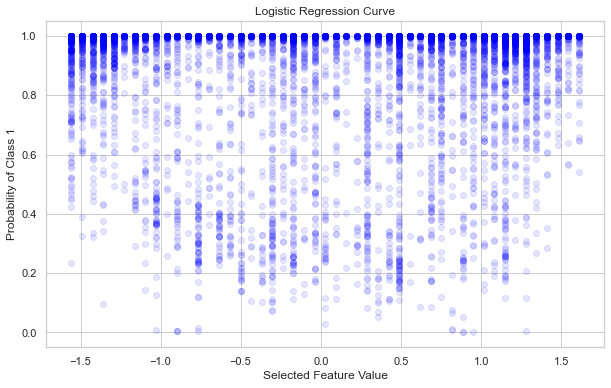

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Set the style of the visualization
sns.set(style="whitegrid")

# Sort values for a smoother curve
sort_indices = np.argsort(selected_feature)
selected_feature_sorted = selected_feature[sort_indices]
probabilities_sorted = probabilities[sort_indices]

# Plot logistic regression curve
plt.figure(figsize=(10, 6))
plt.scatter(selected_feature_sorted, probabilities_sorted, color='blue', alpha=0.1)
plt.title('Logistic Regression Curve')
plt.xlabel('Selected Feature Value')
plt.ylabel('Probability of Class 1')
plt.show()
